In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Machine Learning/SM+SS/27-03-23/student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df['b_address'] = df['address'].apply(lambda x: 0 if x == 'U' else 1)
df['b_address'].value_counts()

df['b_famsize'] = df['famsize'].apply(lambda x: 0 if x == 'LE3' else 1)
df['b_famsize'].value_counts()

df['b_Pstatus'] = df['Pstatus'].apply(lambda x: 0 if x == 'T' else 1)
df['b_Pstatus'].value_counts()

df['b_famsup'] = df['famsup'].apply(lambda x: 0 if x == 'no' else 1)
df['b_famsup'].value_counts()


df['b_paidxtraclasses'] = df['paid'].apply(lambda x: 0 if x == 'no' else 1)
df['b_paidxtraclasses'].value_counts()

df['b_xtraactivities'] = df['activities'].apply(lambda x: 0 if x == 'no' else 1)
df['b_xtraactivities'].value_counts()


df['b_higher_education'] = df['higher'].apply(lambda x: 0 if x == 'no' else 1)

df['b_internet'] = df['internet'].apply(lambda x: 0 if x == 'no' else 1)

df['b_romantic'] = df['romantic'].apply(lambda x: 0 if x == 'no' else 1)

df['b_nursery'] = df['nursery'].apply(lambda x: 0 if x == 'no' else 1)

df['b_guardian'] = df['guardian'].apply(lambda x: 0 if x == 'mother' else (1 if x=='father' else 2))

df['b_reason'] = df['reason'].apply(lambda x: 0 if x == 'home' else (1 if x=='reputation' else (3 if x=='course' else 4)))

df['b_school'] = df['school'].apply(lambda x: 0 if x == 'GP' else 1)

df['b_schoolsup'] = df['schoolsup'].apply(lambda x: 0 if x == 'no' else 1)

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,b_paidxtraclasses,b_xtraactivities,b_higher_education,b_internet,b_romantic,b_nursery,b_guardian,b_reason,b_school,b_schoolsup
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,1,0,0,1,0,3,0,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,0,0,1,1,0,0,1,3,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,1,1,0,1,0,4,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,1,1,1,1,0,0,0,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,1,0,0,1,1,0,0,0


In [9]:
df = df.drop(['school', 'b_school', 'address', 'famsize', 'b_famsize', 'Pstatus', 'reason', 'b_reason',
        'guardian', 'b_guardian', 'famsup', 'b_famsup', 'paid', 'activities', 'b_xtraactivities', 'nursery', 'b_nursery',
        'higher', 'internet', 'romantic', 'famrel', 'freetime'], axis=1)

In [10]:
df = df.rename(columns={'b_address': 'address', 'b_paidxtraclasses': 'paid_classes', 'b_higher_education': 'higher_education',
          'b_internet': 'internet_availability', 'b_romantic': 'relationship', 'b_schoolsup': 'educational_support'})

df.columns

Index(['sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'address', 'b_Pstatus', 'paid_classes',
       'higher_education', 'internet_availability', 'relationship',
       'educational_support'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
df['grade_status'] = df['G3'].apply(lambda x: 'Fail' if x < 12 else 'Pass')
df['grade_status'].value_counts()

Fail    233
Pass    162
Name: grade_status, dtype: int64

In [13]:
df['grade_status'] = df['G3'].apply(lambda x: 'Fail' if x < 12 else 'Pass')
df['grade_status'].value_counts()

Fail    233
Pass    162
Name: grade_status, dtype: int64

In [14]:
corr_matrix = df.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3                       1.000000
G2                       0.904868
G1                       0.801468
Medu                     0.217147
higher_education         0.182465
Fedu                     0.152457
paid_classes             0.101996
internet_availability    0.098483
studytime                0.097820
b_Pstatus                0.058009
absences                 0.034247
Walc                    -0.051939
Dalc                    -0.054660
health                  -0.061335
educational_support     -0.082788
address                 -0.105756
traveltime              -0.117142
relationship            -0.129970
goout                   -0.132791
age                     -0.161579
failures                -0.360415
Name: G3, dtype: float64

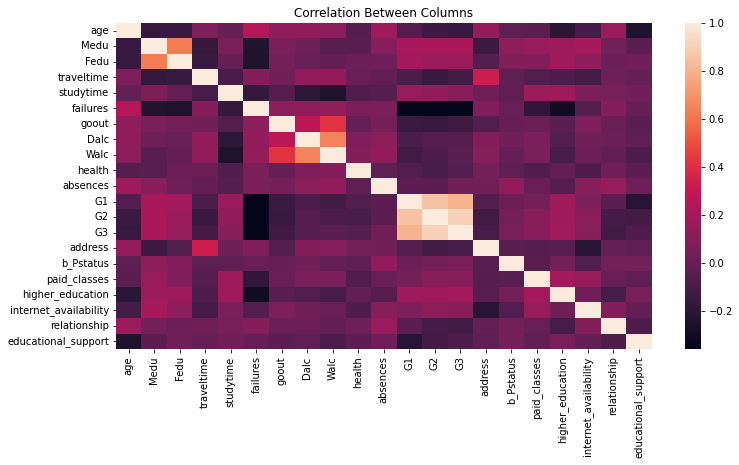

In [15]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(corr_matrix,
           xticklabels=corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values,
            ax = ax,
           ).set_title("Correlation Between Columns")


plt.show()

In [16]:
cross_medu = pd.crosstab(df['Medu'], df['sex']).apply(lambda x: x/x.sum() * 100)
cross_medu

sex,F,M
Medu,,
0,0.961538,0.534759
1,15.384615,14.438503
2,28.846154,22.994652
3,25.480769,24.598930
4,29.326923,37.433155


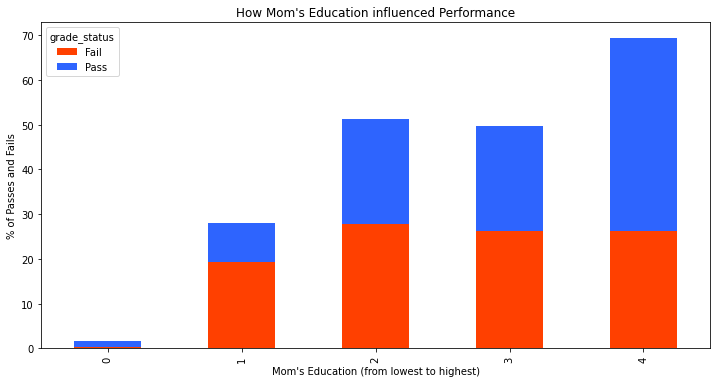

In [17]:
colors = ["#FF4000", "#2E64FE"]
ct = pd.crosstab(df.Medu, df.grade_status).apply(lambda x: x/x.sum() * 100)

ax = ct.plot.bar(stacked=True, color=colors, figsize=(12,6))
ax.set(xlabel="Mom's Education (from lowest to highest)", ylabel='% of Passes and Fails', title="How Mom's Education influenced Performance")
plt.show()

In [18]:
cross_fedu = pd.crosstab(df['Fedu'], df['grade_status']).apply(lambda x: x/x.sum() * 100)
cross_fedu

grade_status,Fail,Pass
Fedu,,
0,0.429185,0.617284
1,24.463519,15.432099
2,29.613734,28.395062
3,26.609442,23.456790
4,18.884120,32.098765


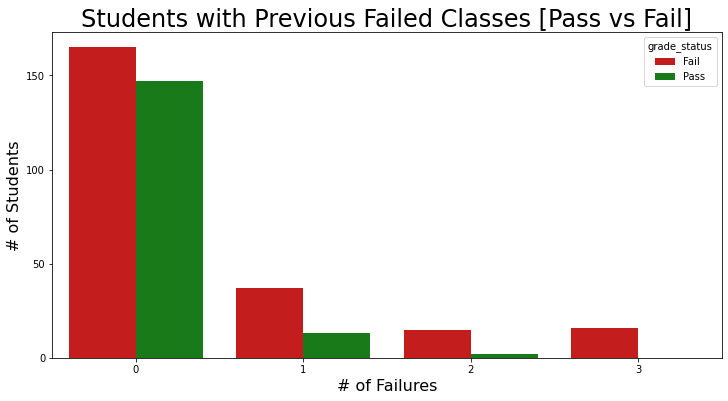

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
colors = ["#DF0101", "#088A08"]
g = sns.countplot(x="failures", hue="grade_status", palette=colors, data=df)
sns.set(style="darkgrid")
g.axes.set_title("Students with Previous Failed Classes [Pass vs Fail]",fontsize=24)
g.set_xlabel("# of Failures",fontsize=16)
g.set_ylabel("# of Students",fontsize=16)
sns.set(font_scale=3)
plt.show()